In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from functions import *

In [2]:
now = dt.datetime.now()
now = now.strftime('%Y-%m-%d')

# Data import

In [3]:
# load last year's ARPA sensor data - downloaded feb 20, 2024 from: https://www.dati.lombardia.it/Ambiente/Dati-sensori-aria/nicp-bhqi/about_data
path = './data/Dati_sensori_aria_20240220.csv'
old_data = pd.read_csv(path)

# load this year's arpa sensor data - downloaded 21 Jan 2025 from: https://www.dati.lombardia.it/Ambiente/Dati-sensori-aria/nicp-bhqi/about_data
path = './data/Dati_sensori_aria_20250121.csv'
data = pd.read_csv(path)

## Milan daily averages of PM2.5

In [4]:
# calculate 24-hour PM2.5 average per collection station
pm_data, mean_milan = pm25_sensors_avg(data)
old_pm_data, old_mean_milan = pm25_sensors_avg(old_data)

# remove redundant data
old_mean_milan = old_mean_milan[old_mean_milan['date'] < mean_milan['date'].min()]
old_pm_data = old_pm_data[old_pm_data['date'] < pm_data['date'].min()]

# merge
mean_milan = pd.concat([old_mean_milan, mean_milan], axis=0)
pm_data = pd.concat([old_pm_data, pm_data], axis=0)

## Milan daily averages of PM10

In [5]:
# calculate 24-hour PM10 average per collection station
pm10_data, mean_pm10_milan = pm10_sensors_avg(data)
old_pm10_data, old_mean_pm10_milan = pm10_sensors_avg(old_data)

# remove redundant data
old_mean_pm10_milan = old_mean_pm10_milan[old_mean_pm10_milan['date'] < mean_pm10_milan['date'].min()]
old_pm10_data = old_pm10_data[old_pm10_data['date'] < mean_pm10_milan['date'].min()]

# merge
mean_pm10_milan = pd.concat([old_mean_pm10_milan, mean_pm10_milan], axis=0)
pm10_data = pd.concat([old_pm10_data, pm10_data], axis=0)

## Lombardia sensor codes

In [6]:
# downloaded feb. 19 2024 from: https://www.dati.lombardia.it/Ambiente/Stazioni-qualit-dell-aria/ib47-atvt/about_data
path = './data/Stazioni_qualit__dell_aria_20240219.csv'
map_data = pd.read_csv(path)

pm_stations = map_data[map_data['NomeTipoSensore'] == 'Particelle sospese PM2.5'].copy()
pm_stations = list(pm_stations['IdSensore'])

pm10_stations = map_data[map_data['NomeTipoSensore'] == 'PM10 (SM2005)'].copy()
pm10_stations = list(pm10_stations['IdSensore'])

In [7]:
len(pm_stations)


41

In [8]:
len(pm10_stations)

91

## Lombardia daily averages of PM2.5

In [9]:
# calculate 24-hour PM2.5 average per collection station
mean_pm_lombardia = calculate_sensor_avg(data, pm_stations)
old_mean_pm_lombardia = calculate_sensor_avg(old_data, pm_stations)

# remove redundant data
old_mean_pm_lombardia = old_mean_pm_lombardia[old_mean_pm_lombardia['date'] < mean_pm_lombardia['date'].min()]

# merge
mean_pm_lombardia = pd.concat([old_mean_pm_lombardia, mean_pm_lombardia], axis=0)

## Lombardia daily averages of PM10

In [10]:
# calculate 24-hour PM10 average per collection station
mean_pm10_lombardia = calculate_sensor_avg(data, pm10_stations)
old_mean_pm10_lombardia = calculate_sensor_avg(old_data, pm10_stations)

# remove redundant data
old_mean_pm10_lombardia = old_mean_pm10_lombardia[old_mean_pm10_lombardia['date'] < mean_pm10_lombardia['date'].min()]

# merge
mean_pm10_lombardia = pd.concat([old_mean_pm10_lombardia, mean_pm10_lombardia], axis=0)

# Plots

## Milan PM2.5

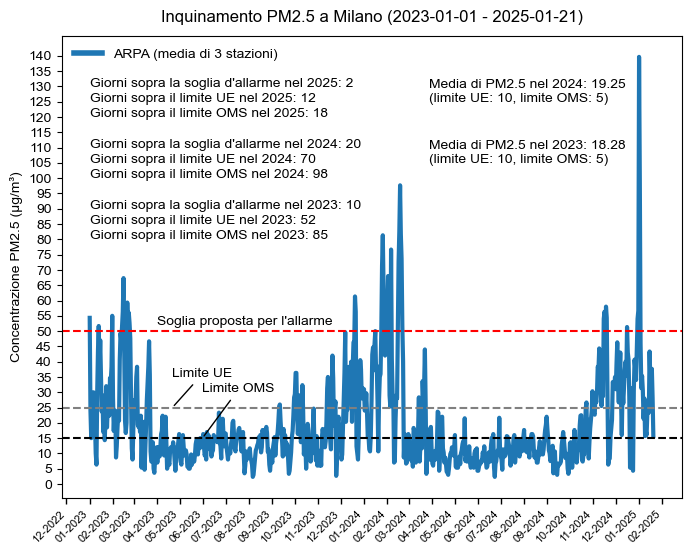

In [11]:
# plot all dates
plot_air_quality_25_milan(mean_milan, 'Milano', '01/01/2023', '1/21/2025', save=True, annotation=True)
filepath = './plots/air_quality_pm25_milan_' + 'all_dates' + '.svg'
plt.savefig(filepath, format='svg', dpi=300, facecolor='w')

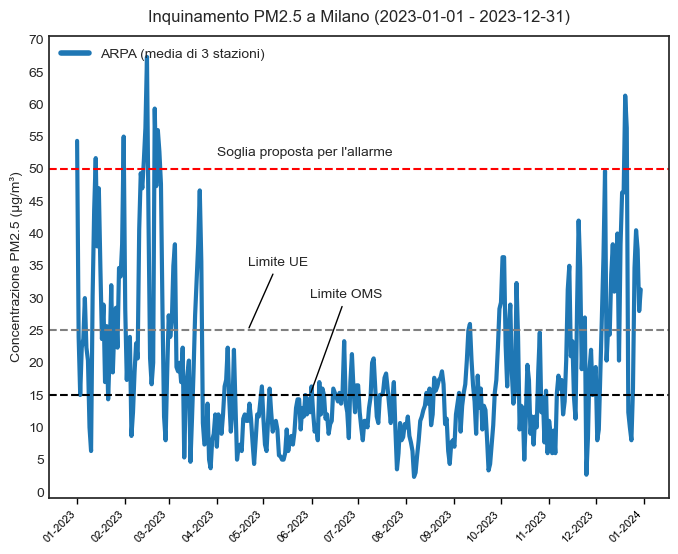

In [12]:
# plot 2023 data
plot_air_quality_25_milan(mean_milan, 'Milano', '01/01/2023', '12/31/2023', save=True, annotation=False)
filepath = './plots/air_quality_pm25_milan_' + '2023' + '.svg'
plt.savefig(filepath, format='svg', dpi=300, facecolor='w')

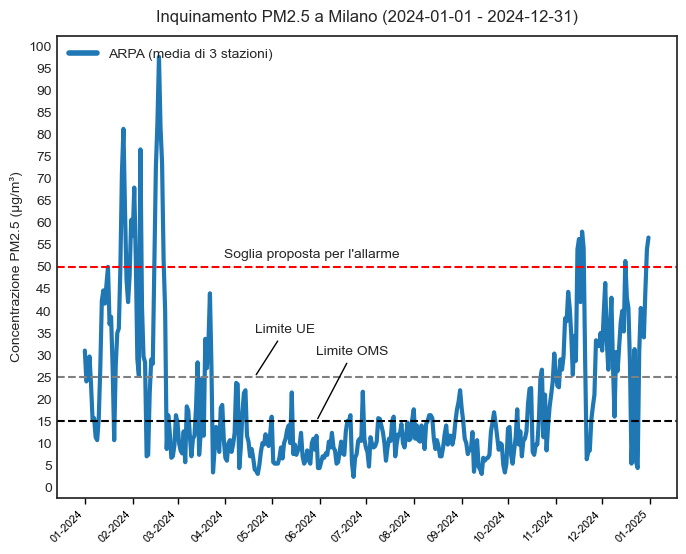

In [13]:
# plot 2024 data
plot_air_quality_25_milan(mean_milan, 'Milano', '01/01/2024', '12/31/2024', save=True, annotation=False)
filepath = './plots/air_quality_pm25_milan_' + '2024' + '.svg'
plt.savefig(filepath, format='svg', dpi=300, facecolor='w')

## Lombardia PM2.5

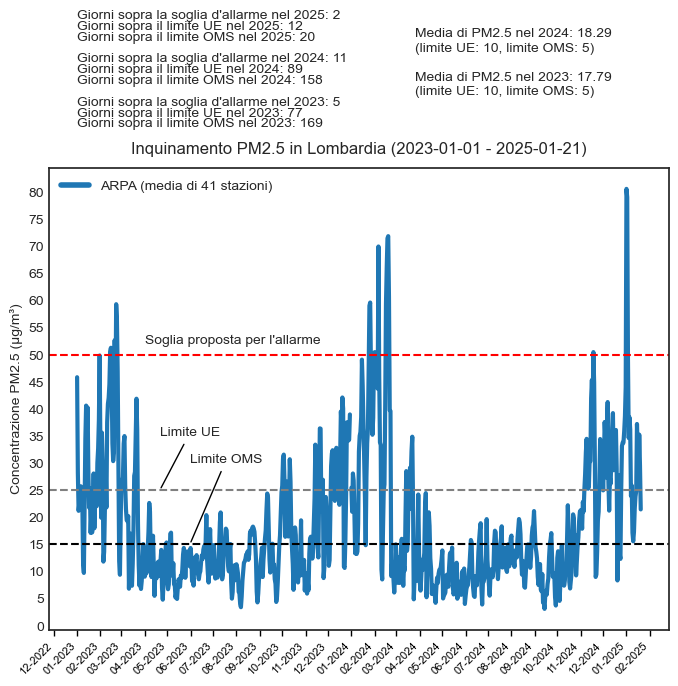

In [23]:
# plot all years
plot_air_quality_25_lombardia(mean_pm_lombardia, 'Lombardia', '01/01/2023', '1/21/2025', save=True, annotation=True)
filepath = './plots/air_quality_pm25_lombardia_' + 'all_dates' + '.svg'
plt.savefig(filepath, format='svg', dpi=300, facecolor='w', bbox_inches='tight')

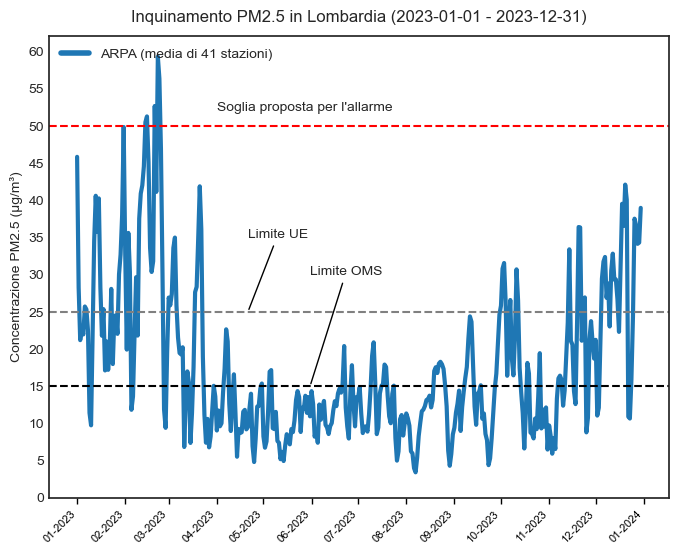

In [15]:
# plot 2023
plot_air_quality_25_lombardia(mean_pm_lombardia, 'Lombardia', '01/01/2023', '12/31/2023', save=True, annotation=False)
filepath = './plots/air_quality_pm25_lombardia_' + '2023' + '.svg'
plt.savefig(filepath, format='svg', dpi=300, facecolor='w')

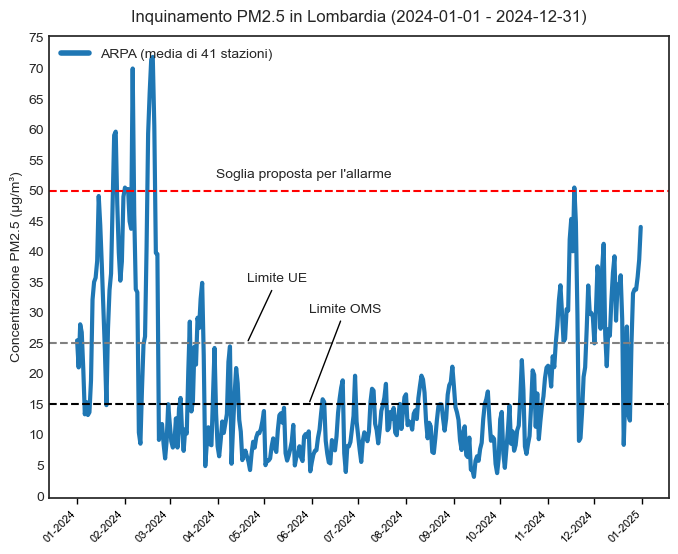

In [16]:
# plot 2024
plot_air_quality_25_lombardia(mean_pm_lombardia, 'Lombardia', '01/01/2024', '12/31/2024', save=True, annotation=False)
filepath = './plots/air_quality_pm25_lombardia_' + '2024' + '.svg'
plt.savefig(filepath, format='svg', dpi=300, facecolor='w')

## Milan PM10 

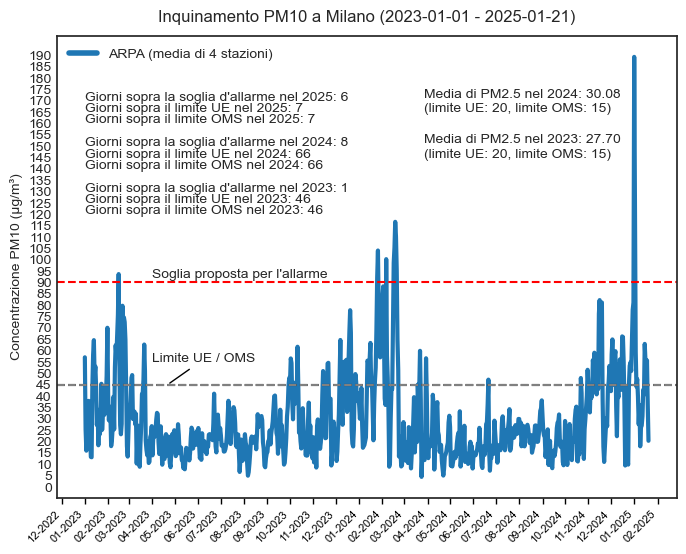

In [17]:
# plot
plot_air_quality_pm10_milan(mean_pm10_milan, 'Milano', '01/01/2023', '1/21/2025', save=True, annotation=True)
filepath = './plots/air_quality_pm10_milan_' + 'all_dates' + '.svg'
plt.savefig(filepath, format='svg', dpi=300, facecolor='w')

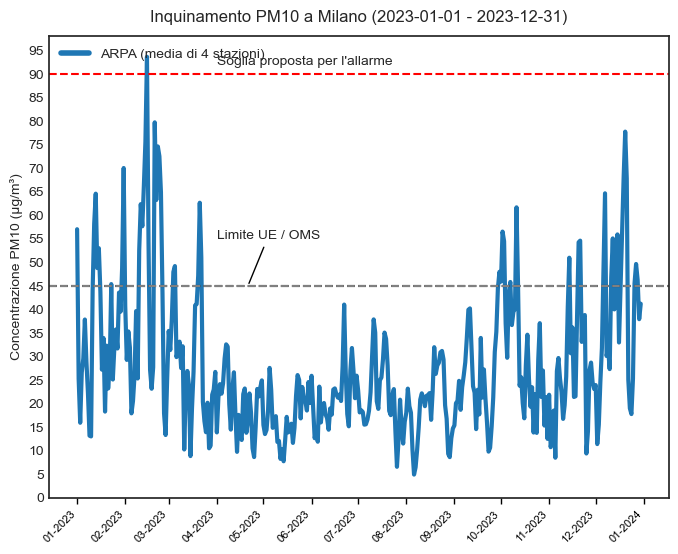

In [18]:
# plot 2023
plot_air_quality_pm10_milan(mean_pm10_milan, 'Milano', '01/01/2023', '12/31/2023', save=True, annotation=False)
filepath = './plots/air_quality_pm10_milan_' + '2023' + '.svg'
plt.savefig(filepath, format='svg', dpi=300, facecolor='w')

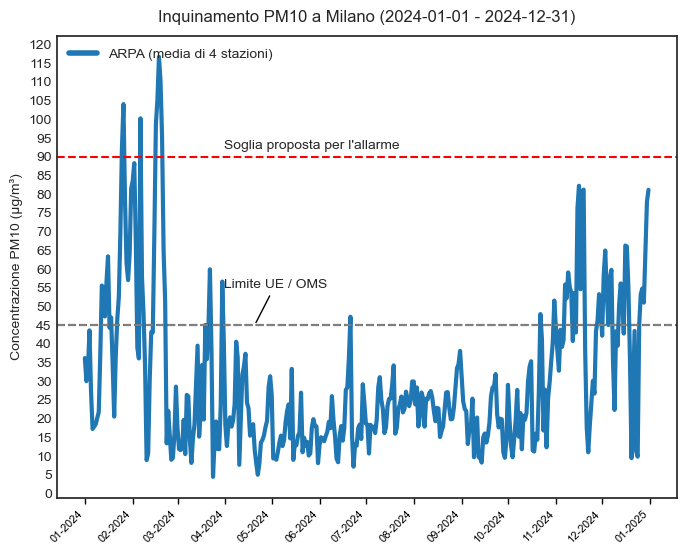

In [19]:
# plot 2024
plot_air_quality_pm10_milan(mean_pm10_milan, 'Milano', '01/01/2024', '12/31/2024', save=True, annotation=False)
filepath = './plots/air_quality_pm10_milan_' + '2024' + '.svg'
plt.savefig(filepath, format='svg', dpi=300, facecolor='w')

## Lombardia PM10

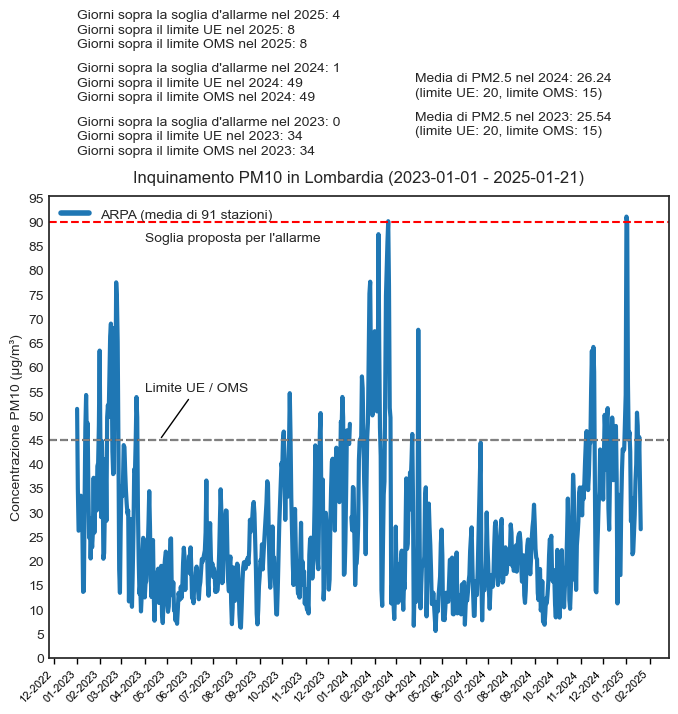

In [24]:
# plot all dates
plot_air_quality_pm10_lombardia(mean_pm10_lombardia, 'Lombardia', '01/01/2023', '1/21/2025', save=True, annotation=True)
filepath = './plots/air_quality_pm10_lombardia_' + 'all_dates' + '.svg'
plt.savefig(filepath, format='svg', dpi=300, facecolor='w', bbox_inches='tight')

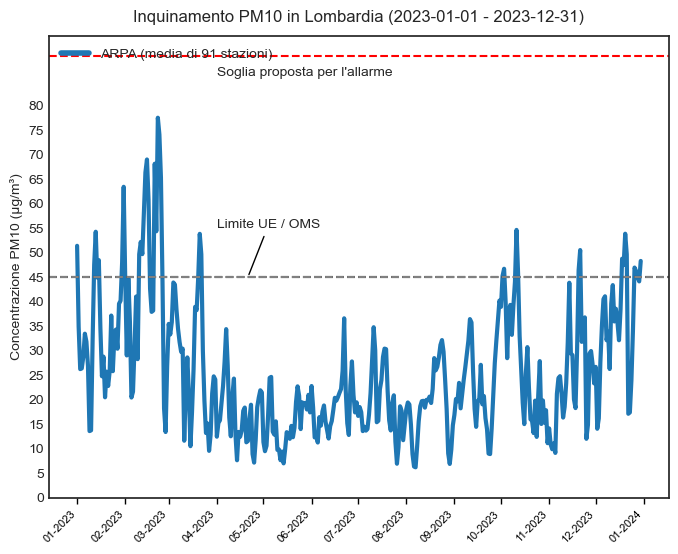

In [21]:
# plot 2023
plot_air_quality_pm10_lombardia(mean_pm10_lombardia, 'Lombardia', '01/01/2023', '12/31/2023', save=True, annotation=False)
filepath = './plots/air_quality_pm10_lombardia_' + '2023' + '.svg'
plt.savefig(filepath, format='svg', dpi=300, facecolor='w')

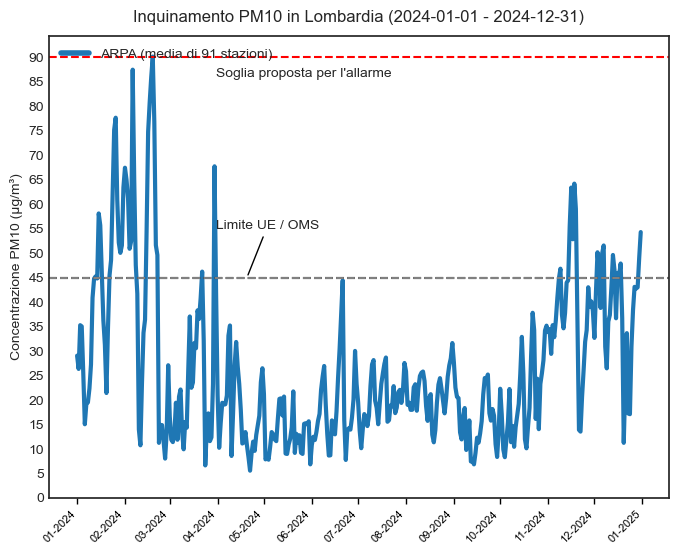

In [22]:
# plot 2024
plot_air_quality_pm10_lombardia(mean_pm10_lombardia, 'Lombardia', '01/01/2024', '12/31/2024', save=True, annotation=False)
filepath = './plots/air_quality_pm10_lombardia_' + '2024' + '.svg'
plt.savefig(filepath, format='svg', dpi=300, facecolor='w')

# Data export

In [26]:
def filter_data(data, start_date, end_date):
    # Filter data to all times
    start_date = pd.to_datetime(start_date).date()
    end_date = pd.to_datetime(end_date).date()

    filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]
    return filtered_data

In [29]:
# all dates
pm25_milan_all = filter_data(mean_milan, '01/01/2023', '1/21/2025')
pm25_milan_all.to_csv('./data/data_export/pm25_milan_all.csv', index=False)

pm10_milan_all = filter_data(mean_pm10_milan, '01/01/2023', '1/21/2025')
pm10_milan_all.to_csv('./data/data_export/pm10_milan_all.csv', index=False)

pm25_lombardia_all = filter_data(mean_pm_lombardia, '01/01/2023', '1/21/2025')
pm25_lombardia_all.to_csv('./data/data_export/pm25_lombardia_all.csv', index=False)

pm10_lombardia_all = filter_data(mean_pm10_lombardia, '01/01/2023', '1/21/2025')
pm10_lombardia_all.to_csv('./data/data_export/pm10_lombardia_all.csv', index=False)

In [30]:
# 2023
pm25_milan_2023 = filter_data(mean_milan, '01/01/2023', '12/31/2023')
pm25_milan_2023.to_csv('./data/data_export/pm25_milan_2023.csv', index=False)

pm10_milan_2023 = filter_data(mean_pm10_milan, '01/01/2023', '12/31/2023')
pm10_milan_2023.to_csv('./data/data_export/pm10_milan_2023.csv', index=False)

pm25_lombardia_2023 = filter_data(mean_pm_lombardia, '01/01/2023', '12/31/2023')
pm25_lombardia_2023.to_csv('./data/data_export/pm25_lombardia_2023.csv', index=False)

pm10_lombardia_2023 = filter_data(mean_pm10_lombardia, '01/01/2023', '12/31/2023')
pm10_lombardia_2023.to_csv('./data/data_export/pm10_lombardia_2023.csv', index=False)

In [31]:
# 2024
pm25_milan_2024 = filter_data(mean_milan, '01/01/2024', '12/31/2024')
pm25_milan_2024.to_csv('./data/data_export/pm25_milan_2024.csv', index=False)

pm10_milan_2024 = filter_data(mean_pm10_milan, '01/01/2024', '12/31/2024')
pm10_milan_2024.to_csv('./data/data_export/pm10_milan_2024.csv', index=False)

pm25_lombardia_2024 = filter_data(mean_pm_lombardia, '01/01/2024', '12/31/2024')
pm25_lombardia_2024.to_csv('./data/data_export/pm25_lombardia_2024.csv', index=False)

pm10_lombardia_2024 = filter_data(mean_pm10_lombardia, '01/01/2024', '12/31/2024')
pm10_lombardia_2024.to_csv('./data/data_export/pm10_lombardia_2024.csv', index=False)